In [27]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

Initializing NUTS using jitter+adapt_diag...


Sample mean = 58.00, Sample std = 2.00


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 1 seconds.


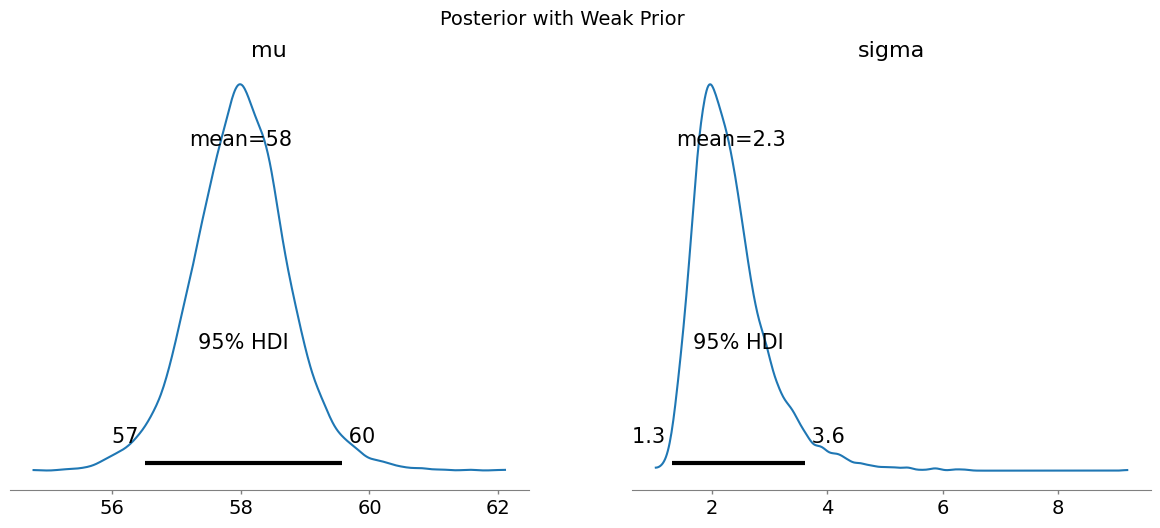

In [28]:
observed = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])

# a) b)

mean = np.mean(observed)
sd = 10
print(f"Sample mean = {mean:.2f}, Sample std = {observed.std(ddof=1):.2f}")

with pm.Model() as weak_model:
    mu = pm.Normal("mu", mu=mean, sigma=sd)
    sigma = pm.HalfNormal("sigma", sigma=sd)
    pm.Normal("y", mu=mu, sigma=sigma, observed=observed)
    
    trace_weak = pm.sample(2000, tune=2000, target_accept=0.9, random_seed=42)
    summary_weak = az.summary(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)


az.plot_posterior(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.suptitle("Posterior with Weak Prior", fontsize=14)
plt.show()



Initializing NUTS using jitter+adapt_diag...


Strong mean = 63.30, Strong std = 5.70

Frequentist estimates:
Mean: 58.00
SD:   2.00


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 1 seconds.


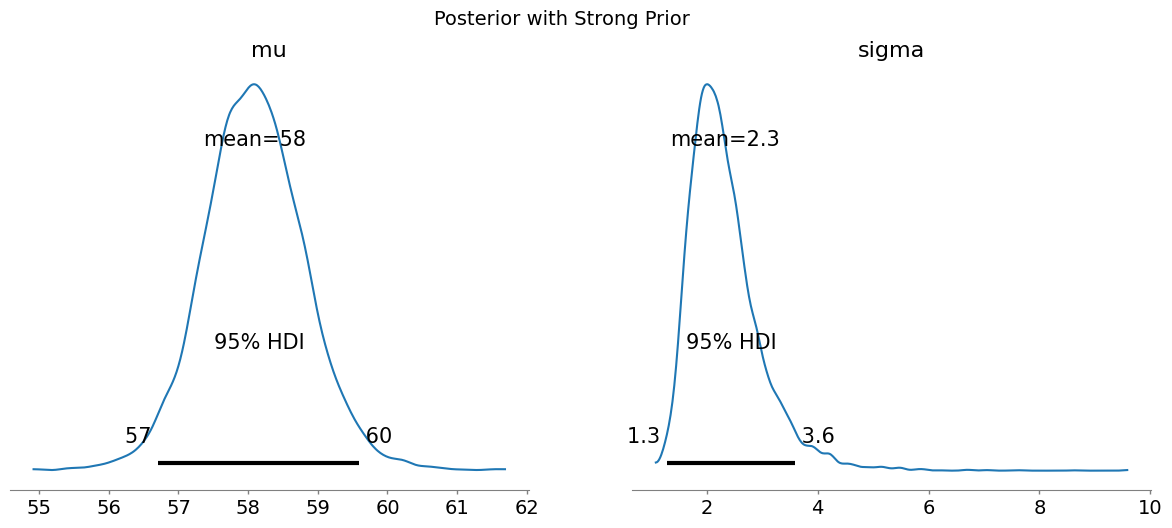

In [29]:
strong_belief_mu = 63.3
strong_belief_sd = 5.7


print(f"Strong mean = {strong_belief_mu:.2f}, Strong std = {strong_belief_sd:.2f}")

print("\nFrequentist estimates:")
print(f"Mean: {np.mean(observed):.2f}")
print(f"SD:   {np.std(observed, ddof=1):.2f}")

with pm.Model() as weak_model:
    mu = pm.Normal("mu", mu=strong_belief_mu, sigma=strong_belief_sd)
    sigma = pm.HalfNormal("sigma", sigma=10)
    pm.Normal("y", mu=mu, sigma=sigma, observed=observed)
    
    trace_weak = pm.sample(2000, tune=2000, target_accept=0.9, random_seed=42)
    summary_weak = az.summary(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)


az.plot_posterior(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.suptitle("Posterior with Strong Prior", fontsize=14)
plt.show()
